<div style='text-align:center' >
    <h1>
        Subplot and Stock
    </h1>
    <h3>
        [Source - Videos from 22 to 25](https://www.youtube.com/playlist?list=PLQVvvaa0QuDfefDfXb9Yf0la1fPDKluPF)
    </h3>
</div>

<h2><div style="float:left; text-align:left; width:*;line-height: 150%">
Previous Part:<br>[Subplots](Matplotlib Tutorial Part 15 - Subplots.ipynb)
</div> 
<div style='margin: 0 auto; text-align:center; width:190px;line-height: 150%' >
[Table of Contents](Table of Contents.ipynb)
</div></h2>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import urllib
import numpy as np

## Getting and Cleaning Data

In [2]:
stock = "EBAY"

# Not needed in Python2.7
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

# Yahoo Finance API
stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/' +stock+ '/chartdata;type=quote;range=1y/csv'

# Getting Data from Yahoo Finance API
source_code = urllib.request.urlopen(stock_price_url).read().decode()

# Cleaning Data
stock_data = []  
split_source = source_code.split('\n')

for line in split_source:
    split_line = line.split(',')
    if len(split_line) == 6:
        if 'values' not in line and 'labels' not in line:
            stock_data.append(line)

# Unpacking Data
date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                      delimiter=',',
                                                      unpack=True,
                                                      converters={0: bytespdate2num('%Y%m%d')})

## Avarage Function

In [3]:
MA1 = 10
MA2 = 30

def moving_average(values,window):
    weights = np.repeat(1.0,window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


## High Minus Lows

In [4]:
def high_minus_low(highs, lows):
    return [i-j for i,j in zip(highs,lows)]

##  Subplot and Stock

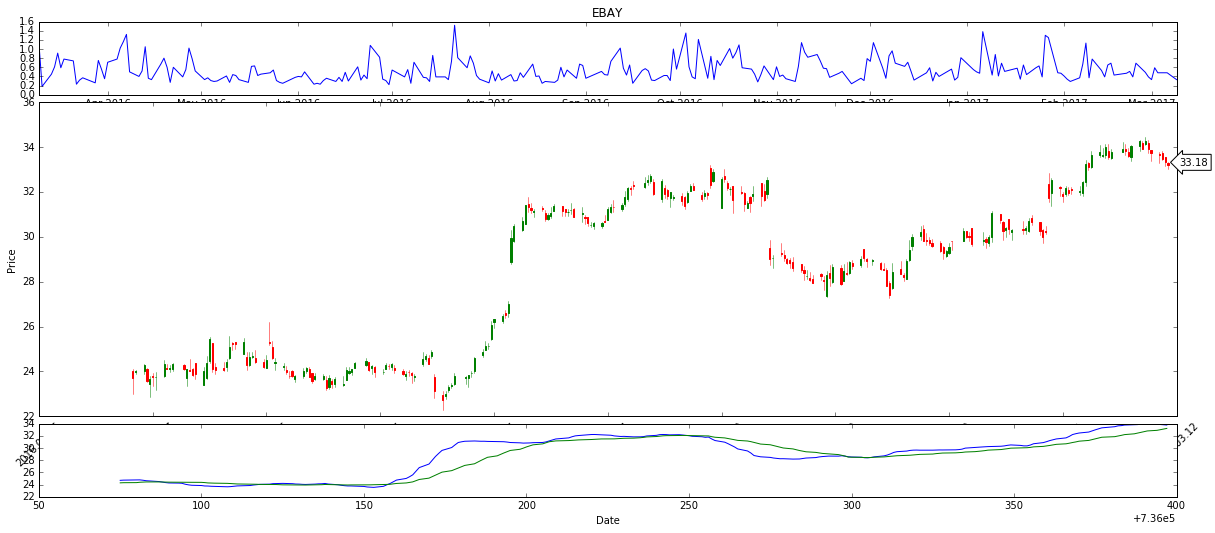

In [5]:
fig = plt.figure(figsize=(20,10))
# Setting Subplots
ax1 = plt.subplot2grid((6,1),(0,0), rowspan=1,colspan=1)
plt.title(stock)
ax2 = plt.subplot2grid((6,1),(1,0), rowspan=4,colspan=1)
plt.ylabel('Price')
ax3 = plt.subplot2grid((6,1),(5,0), rowspan=1,colspan=1)
plt.xlabel('Date')
plt.subplots_adjust(left=0.11,
                   bottom=0.24,
                   right=0.9,
                   top=0.9,
                   wspace=0.2,
                   hspace=0.1)

# Subplot AX1

#Set High Minus Low Data
h_l = high_minus_low(highp,lowp)

ax1.plot_date(date,h_l,'-')


# Subplot AX2

# Set Candlestick OHLC
x = 0
ohlc = []
for x,y in enumerate(date):
    append_me = y, openp[x], highp[x], lowp[x],closep[x], volume[x]
    ohlc.append(append_me)

candlestick_ohlc(ax2, ohlc,width=.4,colorup='g',colordown='r')

# Anotation
bbox_props = dict(boxstyle='larrow',fc='w',ec='k')
ax2.annotate(str(closep[-1]), (date[-1],closep[-1]), 
             xytext=(date[-1]+4, closep[-1]),
             bbox = bbox_props)

# Set amount of dates
ax2.xaxis.set_major_locator(mticker.MaxNLocator(10))

# Set Date Format
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# Rotate Labels
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)

# Subplot AX3

# Set Moving Average Data    
ma1 = moving_average(closep,MA1)
ma2 = moving_average(closep,MA2)
start = len(date[MA2-1:])

ax3.plot(date[-start:], ma1[-start:])
ax3.plot(date[-start:], ma2[-start:])


plt.show()

##  Subplot and Stock Customized

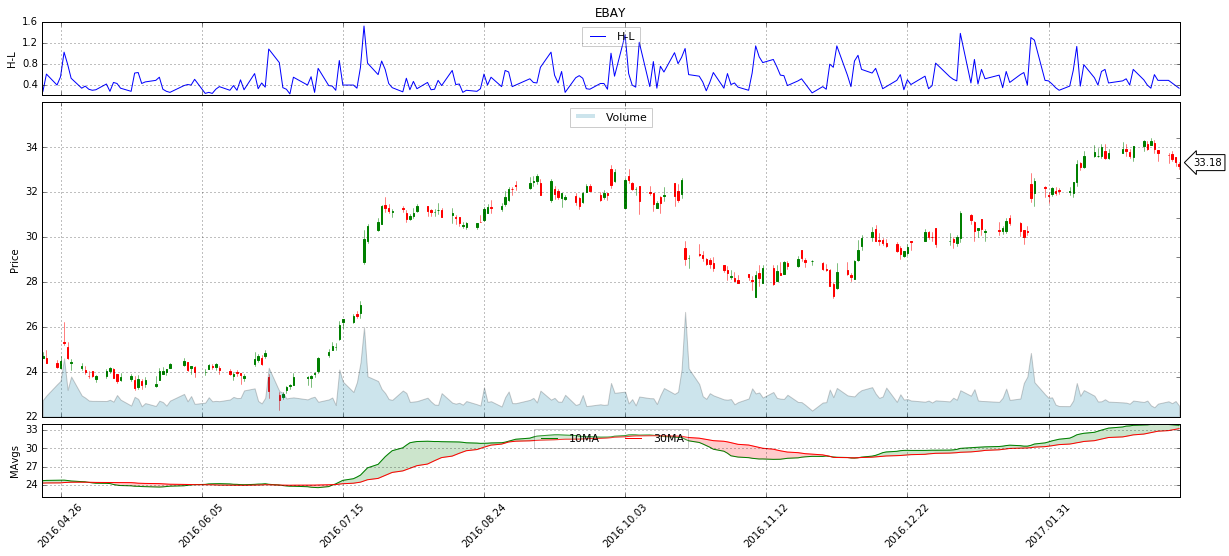

In [6]:
fig = plt.figure(figsize=(20,10))

# Setting Subplots
ax1 = plt.subplot2grid((6,1),(0,0), rowspan=1, colspan=1)
plt.title(stock)
plt.ylabel('H-L')

ax2 = plt.subplot2grid((6,1),(1,0), rowspan=4, colspan=1, sharex=ax1)
plt.ylabel('Price')
ax2v = ax2.twinx()

ax3 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex=ax1)
plt.ylabel('MAvgs')
plt.subplots_adjust(left=0.11,
                   bottom=0.24,
                   right=0.9,
                   top=0.9,
                   wspace=0.2,
                   hspace=0.1)



# Subplot AX1

#Set High Minus Low Data
h_l = high_minus_low(highp,lowp)

ax1.plot_date(date[-start:],h_l[-start:],'-',label='H-L')

# Set prune
ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5,prune='lower'))

# Show Grid
ax1.grid(True)

# Show Legend
ax1.legend()
leg = ax1.legend(loc=9, ncol=2, prop={'size':11})
leg.get_frame().set_alpha(0.2)



# Subplot AX2

# Set Candlestick OHLC
x = 0
ohlc = []
for x,y in enumerate(date):
    append_me = y, openp[x], highp[x], lowp[x],closep[x], volume[x]
    ohlc.append(append_me)

candlestick_ohlc(ax2, ohlc[-start:],width=.4,colorup='g',colordown='r')

# Anotation
bbox_props = dict(boxstyle='larrow',fc='w',ec='k')
ax2.annotate(str(closep[-1]), (date[-1],closep[-1]), 
             xytext=(date[-1]+4, closep[-1]),
             bbox = bbox_props)

# Set prune
ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=7,prune='upper'))

# Show Grid
ax2.grid(True)


# Adding volume
ax2v.plot([],[],label='Volume',color='#0079a3',alpha=.2,linewidth=4)
ax2v.fill_between(date[-start:], 0, volume[-start:], 
                  facecolor='#0079a3',
                 alpha=.2)

ax2v.axes.yaxis.set_ticklabels([])
ax2v.grid(False)

ax2v.set_ylim(0,3*volume.max())

# Show Legend
ax2v.legend()
leg = ax2v.legend(loc=9, ncol=2, prop={'size':11})
leg.get_frame().set_alpha(0.2)



# Subplot AX3

# Set Moving Average Data    
ma1 = moving_average(closep,MA1)
ma2 = moving_average(closep,MA2)
start = len(date[MA2-1:])

ax3.plot(date[-start:], ma1[-start:], linewidth=1,color='g', label=str(MA1)+'MA')
ax3.plot(date[-start:], ma2[-start:], linewidth=1,color='r', label=str(MA2)+'MA')

# Add Fills
bad = ma1[-start:] < ma2[-start:]
ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:], 
                 where=(bad),
                 facecolor='r',
                 edgecolor='r',
                 alpha=.2)
good =ma1[-start:] > ma2[-start:]
ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:], 
                 where=(good),
                 facecolor='g',
                 edgecolor='g',
                 alpha=.2)

# Set amount of dates
ax3.xaxis.set_major_locator(mticker.MaxNLocator(10))

# Set Date Format
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# Rotate Labels
for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(45)


# Set prune
ax3.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5,prune='upper'))

# Show Grid
ax3.grid(True)

# Show Legend
ax3.legend()
leg = ax3.legend(loc=9, ncol=2, prop={'size':11})
leg.get_frame().set_alpha(0.2)

#Remove Axis Labels
plt.setp(ax1.get_xticklabels(),visible=False)
plt.setp(ax2.get_xticklabels(),visible=False)


plt.show()

<h2><div style="float:left; text-align:left; width:*;line-height: 150%">
Previous Part:<br>[Subplots](Matplotlib Tutorial Part 15 - Subplots.ipynb)
</div> 
<div style='margin: 0 auto; text-align:center; width:190px;line-height: 150%' >
[Table of Contents](Table of Contents.ipynb)
</div></h2>